<a href="https://colab.research.google.com/github/by-thoma/visualization-modeling/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лаборатораня работа № 4 
Цогоева Тамара ВИМ 1.2

In [ ]:
!pip install missingno

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
courses = pd.read_csv("df_norm.csv")
courses.head()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,True,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,True,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,True,45,2174,74,51,2,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,True,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,True,200,1276,45,26,2,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [ ]:
courses.shape

(3480, 10)

В предобработанном в прошлой лр работе меньше 50 столбцов -> он подходит для работы с missingno.

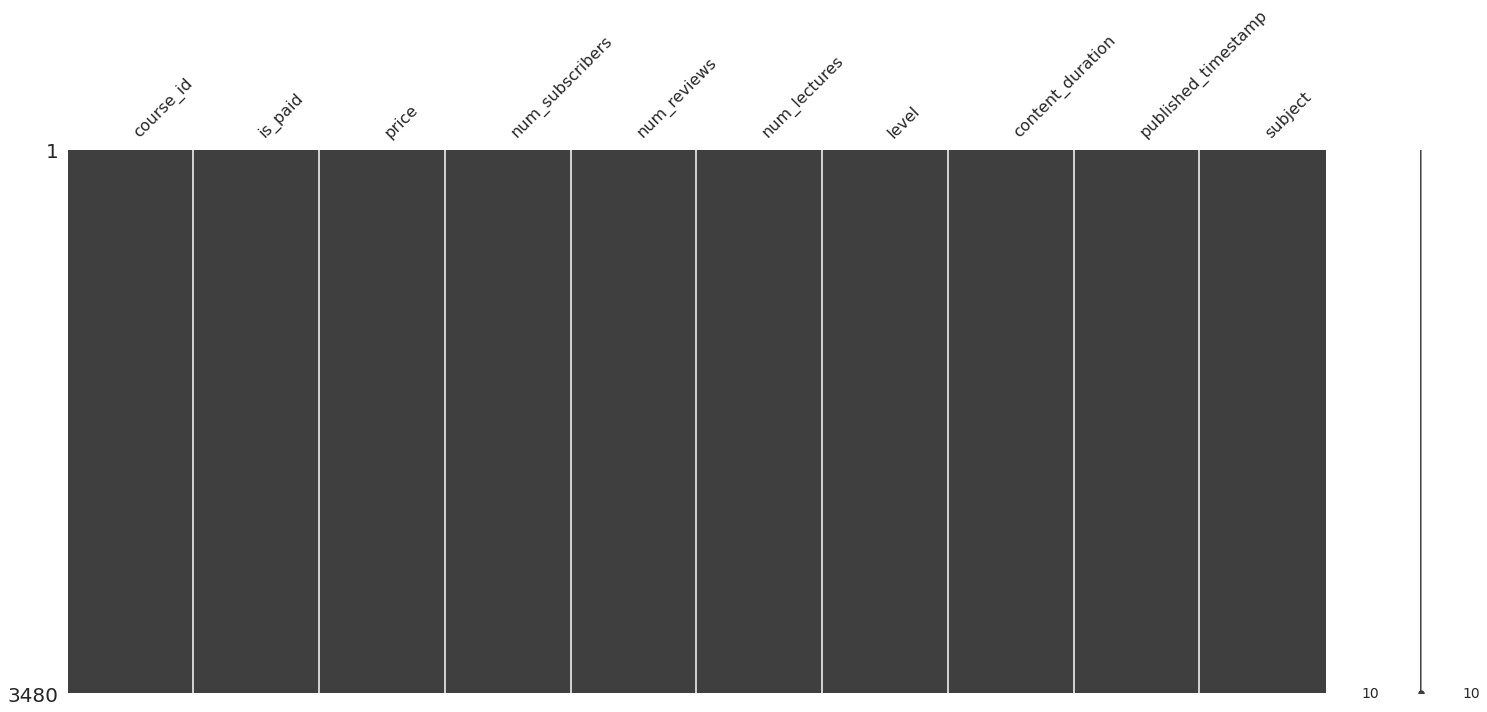

In [ ]:
msno.matrix(courses);

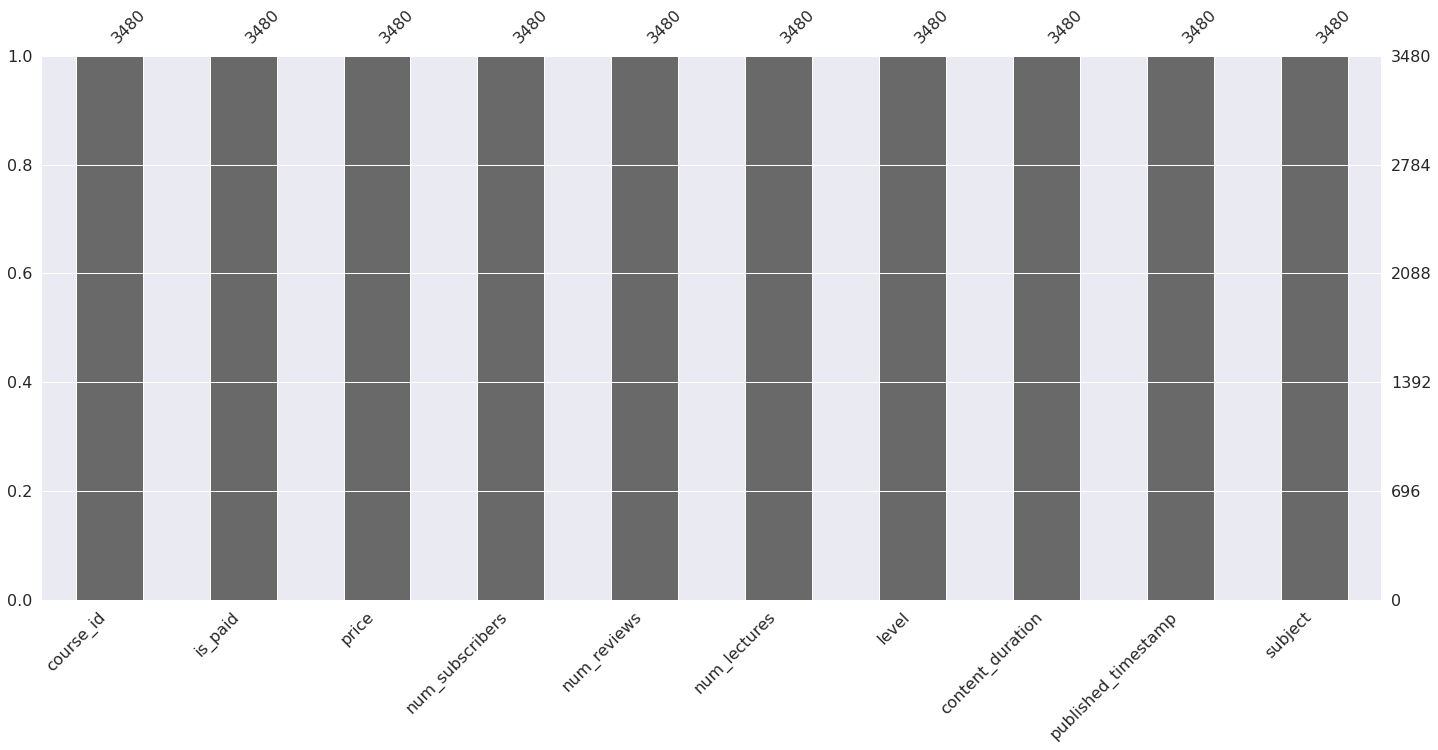

In [ ]:
msno.bar(courses);

Сразу видно, что в стоблцах нет порпусков -> данный вид предобработки в лр.3 прошел успешно. 

#Распределение данных

**Гипотеза 1** Наиболее популярные курсы: Business Finance и Web Development.

Найдем курсы с максимальным числом подписчиков (num_subscribers). 
Для визуализации воспользуемся модулем seaborn.

In [ ]:
import seaborn as sns

In [ ]:
maxes = {subject: courses.num_subscribers.loc[courses["subject"] == subject].max() for subject in courses["subject"].unique()}

In [ ]:
ns = pd.DataFrame.from_dict(data={"Subject": list(maxes.keys()), "Num of subs": list(maxes.values())})

In [ ]:
nsm = ns.sort_values(by=["Num of subs"], ascending=False).head(15).reset_index(drop=True)

In [ ]:
nsm

,Subject,Num of subs
0,Web Development,268923
1,Musical Instruments,101154
2,Business Finance,65576
3,Graphic Design,53851


Визуализируем

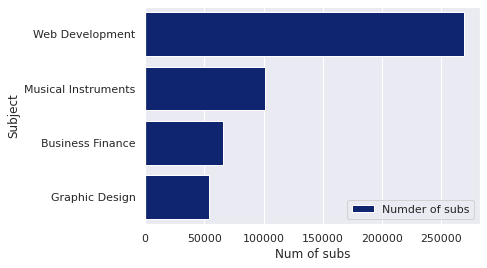

In [ ]:
sns.set_theme(style="darkgrid")
plt.plot()
sns.set_color_codes("dark")
sns.barplot(x="Num of subs", y="Subject", data=nsm, label="Numder of subs", color="b");
plt.legend(ncol=1);

**Гипотеза 2.** Количество подписчиков -> популярность курсов увеличиваются в зависимости от даты его загрузки (популярность новых курсов больше, чем старых).

Возьмем 2 наиболее популярные категории: Web Development и Musical Instruments.

Сделаем визуализацию увеличения количества подписчиков курсов Web Development с помощью plotly.

In [ ]:
web = courses[["num_subscribers", "published_timestamp"]].loc[courses["subject"] == "Web Development"].sort_values(by='published_timestamp')
mus = courses[["num_subscribers", "published_timestamp"]].loc[courses["subject"] == "Musical Instruments"].sort_values(by='published_timestamp')

In [ ]:
import plotly.express as px

In [ ]:
courses['published_timestamp'] = pd.DatetimeIndex(courses['published_timestamp']).year

In [ ]:
fig = px.line(web, y="num_subscribers", x="published_timestamp", title="Subscribers growth depending on the year")
fig.show()

Как видим, более новые курсы не являются более популярными, наоборот, после середины 2016 количество подписчиков все более уменьшается.

#Ранжирование

Пример работы библиотеки wordcloud.

In [ ]:
from wordcloud import WordCloud

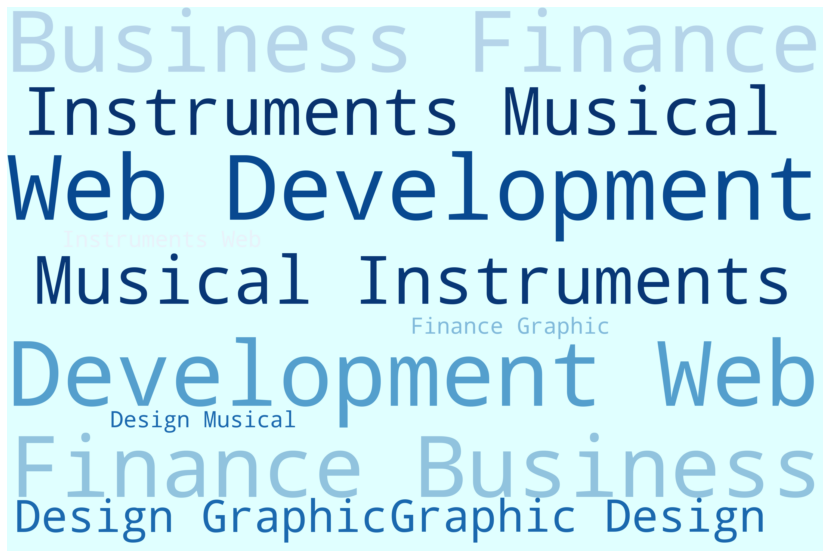

In [ ]:
text = " ".join(courses["subject"].tolist())
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='lightCyan', colormap='Blues_r', collocations=True).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#Отношение части к целому

Построен "пончик", на котором явно показано рапределение курсов по предметным областям.

**Гипотеза 3** Курсов по Web Development и Musical Instruments больше, чем по остальным предметным областям.

In [ ]:
import plotly.graph_objects as go

In [ ]:
sub = {s: courses.subject.tolist().count(s) for s in courses.subject.unique()}
labels = list(sub.keys())
values = list(sub.values())

In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()

Из "пончика" видно, что курсов Musical Instruments существенно меньше, чем Business Finance, однако имеет большую популярность (большее число подписчиков), что можно увидеть на графике к Гипотезе 2. 

#Развитие событий

Из графика видно, что количество подписчиков Musical Instruments тоже идут на убыль даже больше, чем по Web Develorment. В лабораторной работе 2 было выяснено, что после 2016 года количество курсов становится все меньше в данном датасете, поэтому вероятно, количество подписчиков настолько уменьшилось на этот период потому что курсов по данной теме в целом стало меньше.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=web["published_timestamp"], y=web["num_subscribers"], fill="tozeroy"))
fig.add_trace(go.Scatter(x=mus["published_timestamp"], y=mus["num_subscribers"], fill="tonexty"))
fig.show()